In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_squared_error

In [5]:
df = pd.read_csv('../train.csv', parse_dates=['datetime'])
print(df.shape)
df.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [23]:
train = df[df['datetime'] < '2011-02']['count'].astype('float32').tolist()
test = df[(df['datetime'] > '2011-02') & (df['datetime'] < '2011-03')]['count'].astype('float32').tolist()
len(train), len(test)

(431, 445)

In [32]:
dataset = pd.Series(train+test)
dataset

0       16.0
1       40.0
2       32.0
3       13.0
4        1.0
5        1.0
6        2.0
7        3.0
8        8.0
9       14.0
10      36.0
11      56.0
12      84.0
13      94.0
14     106.0
15     110.0
16      93.0
17      67.0
18      35.0
19      37.0
20      36.0
21      34.0
22      28.0
23      39.0
24      17.0
25      17.0
26       9.0
27       6.0
28       3.0
29       2.0
       ...  
846    224.0
847    162.0
848    124.0
849     72.0
850    107.0
851     77.0
852     29.0
853     31.0
854     17.0
855      7.0
856      3.0
857      3.0
858      6.0
859     22.0
860     45.0
861     55.0
862    106.0
863    123.0
864    119.0
865    155.0
866    196.0
867    171.0
868    120.0
869    127.0
870     88.0
871     59.0
872     47.0
873     33.0
874     44.0
875     29.0
dtype: float64

In [27]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

In [43]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [44]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_dim=look_back))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=2)

Epoch 1/100
1s - loss: 5249.5922
Epoch 2/100
1s - loss: 5157.3867
Epoch 3/100
1s - loss: 5069.4130
Epoch 4/100
1s - loss: 4985.3928
Epoch 5/100
1s - loss: 4904.6076
Epoch 6/100
1s - loss: 4825.3743
Epoch 7/100
1s - loss: 4747.9131
Epoch 8/100
1s - loss: 4672.5874
Epoch 9/100
1s - loss: 4598.7813
Epoch 10/100
1s - loss: 4475.2894
Epoch 11/100
1s - loss: 4345.8514
Epoch 12/100
1s - loss: 4253.3032
Epoch 13/100
1s - loss: 4165.1880
Epoch 14/100
1s - loss: 4079.9627
Epoch 15/100
1s - loss: 3998.8643
Epoch 16/100
1s - loss: 3919.0610
Epoch 17/100
1s - loss: 3842.5570
Epoch 18/100
1s - loss: 3767.9958
Epoch 19/100
1s - loss: 3696.1012
Epoch 20/100
1s - loss: 3626.9428
Epoch 21/100
1s - loss: 3558.4739
Epoch 22/100
1s - loss: 3493.6495
Epoch 23/100
1s - loss: 3432.0752
Epoch 24/100
1s - loss: 3368.2758
Epoch 25/100
1s - loss: 3312.3865
Epoch 26/100
1s - loss: 3251.1482
Epoch 27/100
1s - loss: 3187.7955
Epoch 28/100
4s - loss: 3133.5607
Epoch 29/100
5s - loss: 3076.3546
Epoch 30/100
6s - loss:

In [45]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
# trainPredict = scaler.inverse_transform(trainPredict)
# trainY = scaler.inverse_transform([trainY])
# testPredict = scaler.inverse_transform(testPredict)
# testY = scaler.inverse_transform([testY])
# calculate root mean squared error
# trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
# print('Train Score: %.2f RMSE' % (trainScore))
# testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
# print('Test Score: %.2f RMSE' % (testScore))

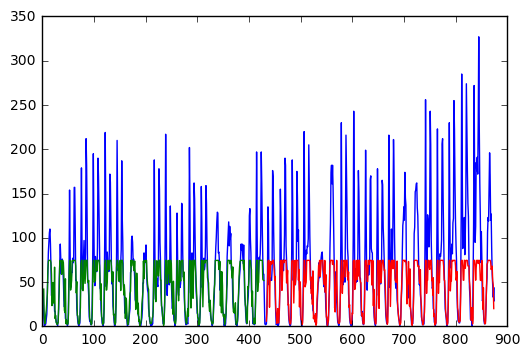

In [46]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back] = trainPredict[:,0]
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1] = testPredict[:,0]
# plot baseline and predictions
# plt.plot(scaler.inverse_transform(dataset))
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()